In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
df=pd.read_csv("C:\\Users\\sravanthi\\Downloads\\ToyotaCorolla.csv",encoding="latin1")
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
df1= pd.DataFrame({"Price":df.Price,"Age":df.Age_08_04,"KM":df.KM,"HP":df.HP,"CC":df.cc,"Doors":df.Doors,"Gears":df.Gears,"QuarterlyTax":df.Quarterly_Tax,"Weight":df.Weight})

In [ ]:
df1

,Price,Age,KM,HP,CC,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Price         1436 non-null   int64
 1   Age           1436 non-null   int64
 2   KM            1436 non-null   int64
 3   HP            1436 non-null   int64
 4   CC            1436 non-null   int64
 5   Doors         1436 non-null   int64
 6   Gears         1436 non-null   int64
 7   QuarterlyTax  1436 non-null   int64
 8   Weight        1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [ ]:
df1.isna().sum()

Price           0
Age             0
KM              0
HP              0
CC              0
Doors           0
Gears           0
QuarterlyTax    0
Weight          0
dtype: int64

In [ ]:
df1.duplicated().sum()

1

In [ ]:
df1[df1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QuarterlyTax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
df1 = df1.drop_duplicates()

In [ ]:
df1

,Price,Age,KM,HP,CC,Doors,Gears,QuarterlyTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
df1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QuarterlyTax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QuarterlyTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


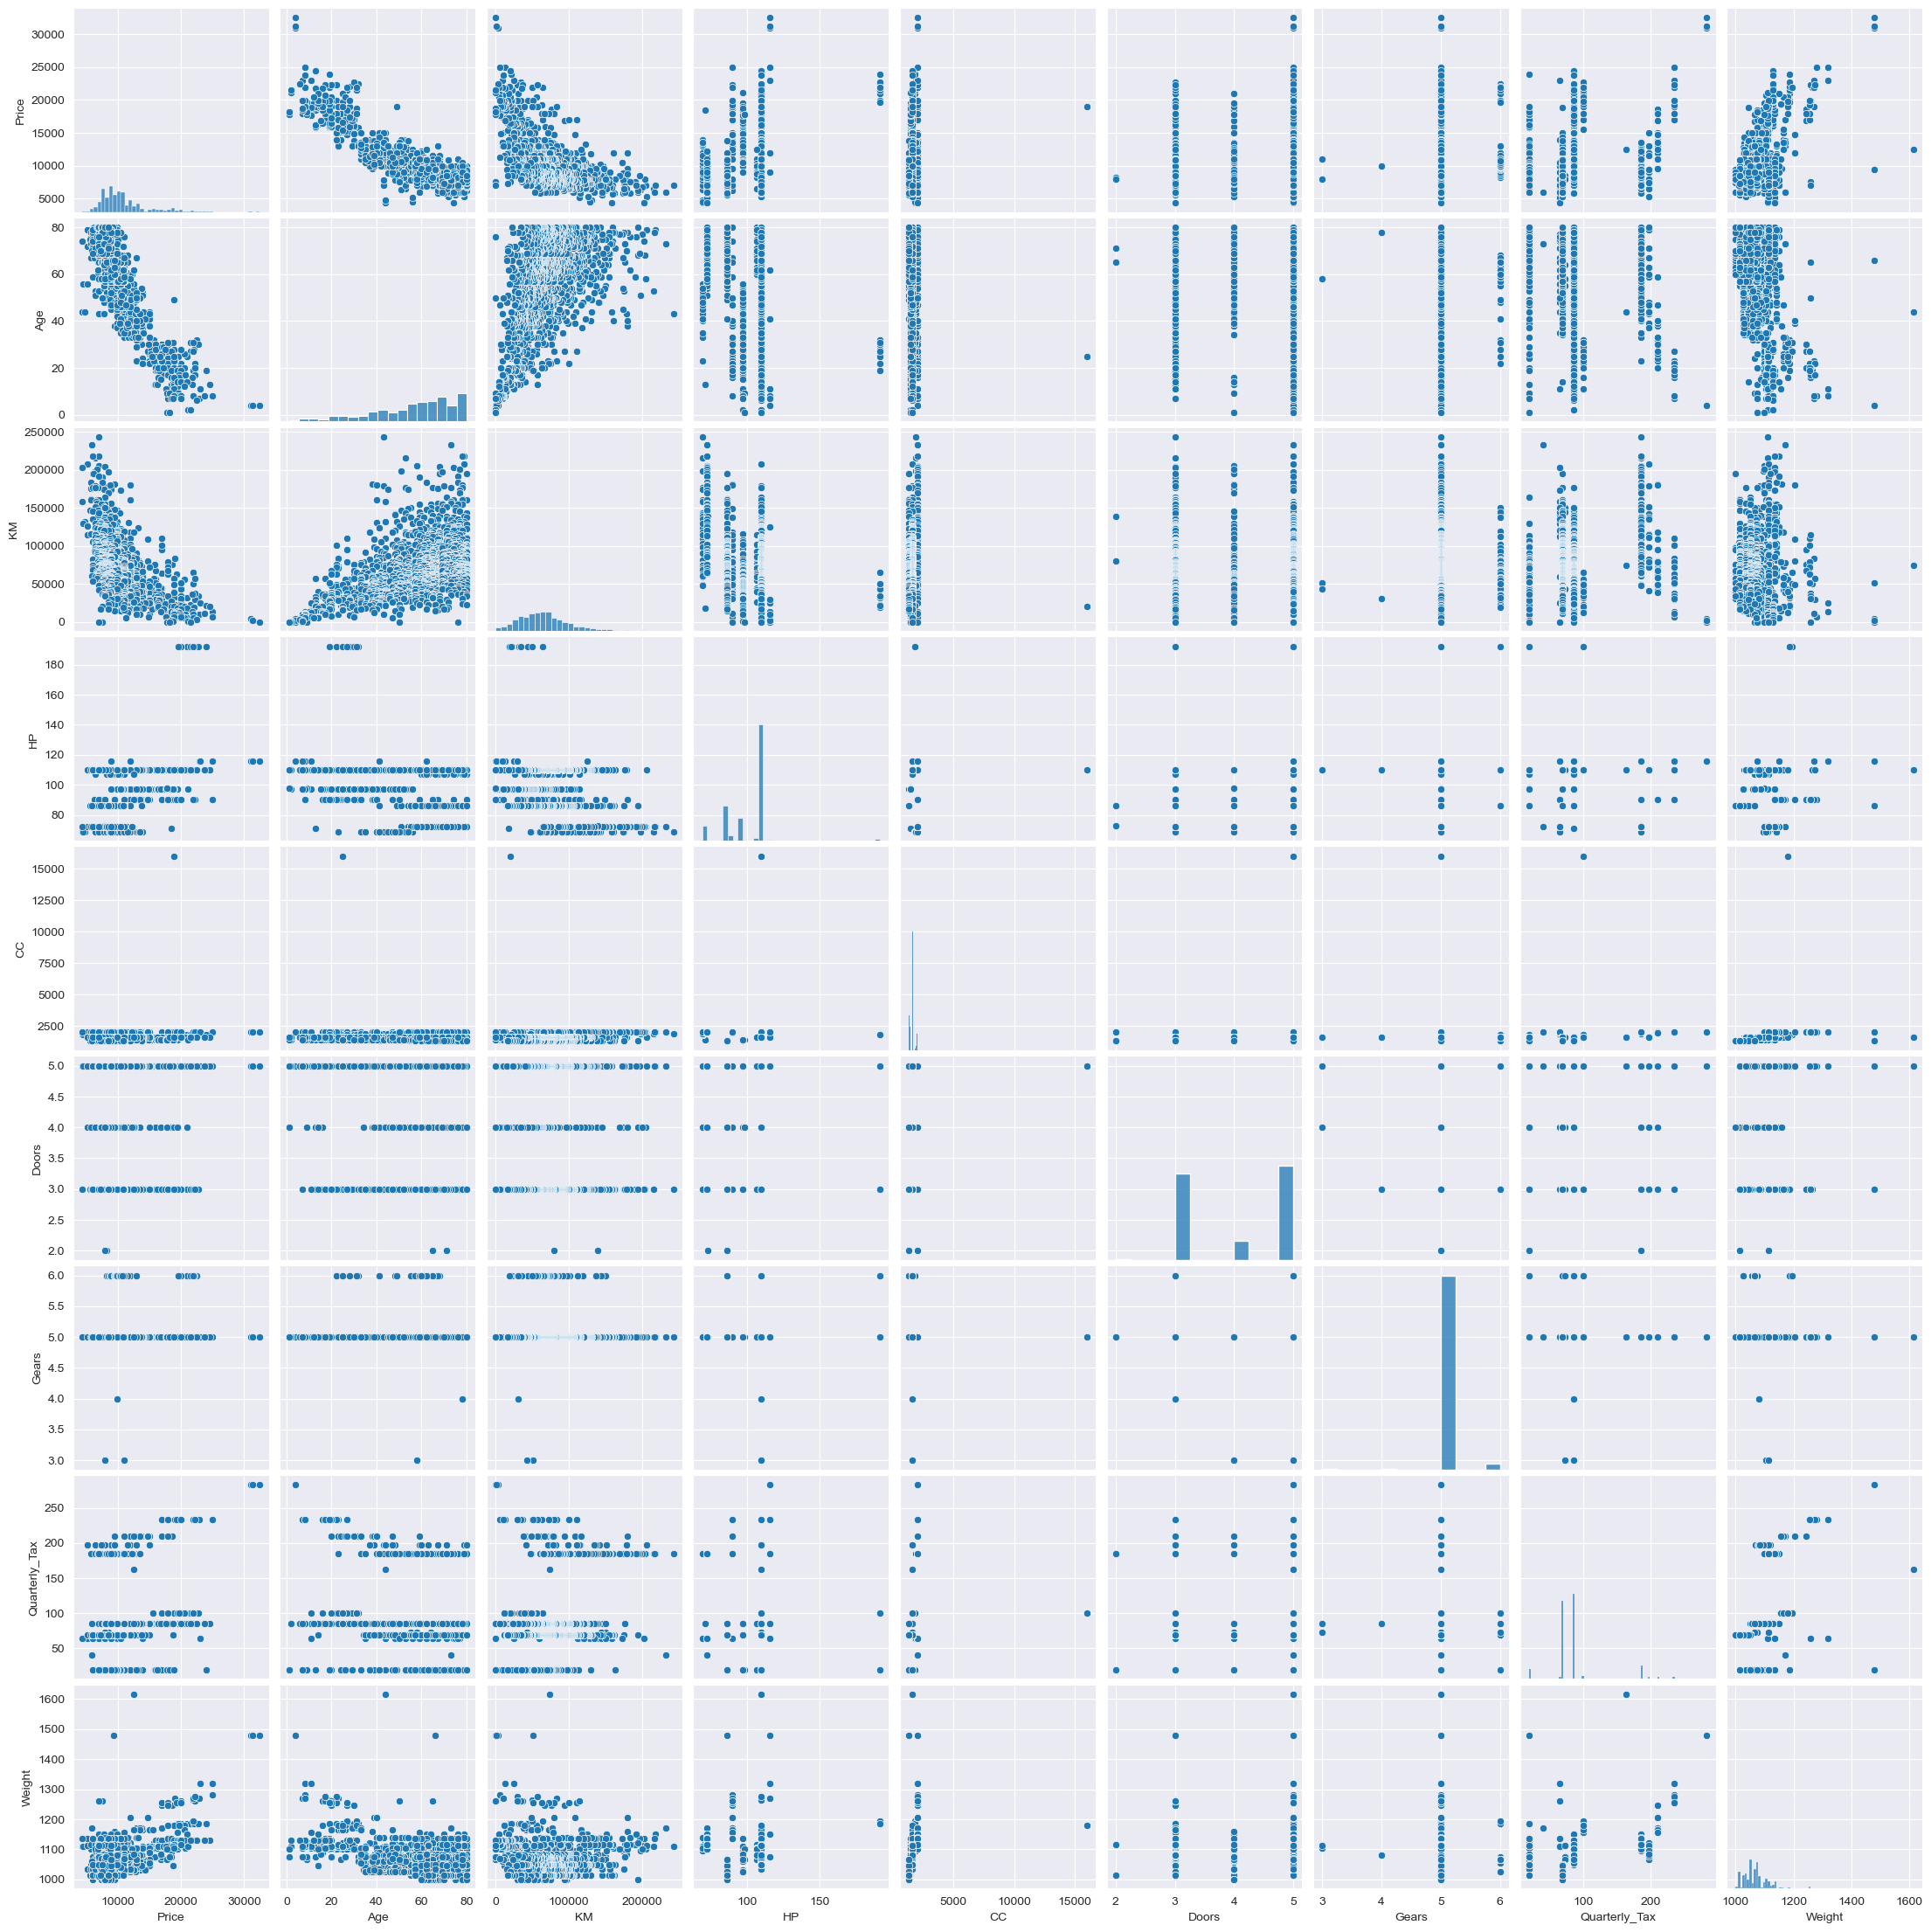

In [ ]:
sns.set_style(style="darkgrid")
sns.pairplot(df1)

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QuarterlyTax+Weight",data=df1).fit()

In [ ]:
model.params

Intercept      -5472.540368
Age             -121.713891
KM                -0.020737
HP                31.584612
CC                -0.118558
Doors             -0.920189
Gears            597.715894
QuarterlyTax       3.858805
Weight            16.855470
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        03:14:07   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age           -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM              -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP              31.5846      2.818     11.210      0.000      26.058      37.112
CC              -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors           -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears          597.7159    196.969      3.035      0.002     211.335     984.097
QuarterlyTax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight          16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#checking for multi-collinearity
rsquared_Age = smf.ols("Age~KM+HP+CC+Doors+Gears+QuarterlyTax+Weight",data=df1).fit().rsquared
VIF_Age= 1/(1-rsquared_Age)

rsquared_KM = smf.ols("KM~Age+HP+CC+Doors+Gears+QuarterlyTax+Weight",data=df1).fit().rsquared
VIF_KM = 1/(1-rsquared_KM)

rsquared_HP = smf.ols("HP~Age+KM+CC+Doors+Gears+QuarterlyTax+Weight",data =df1).fit().rsquared
VIF_HP = 1/(1-rsquared_HP)

rsquared_CC = smf.ols("CC~Age+KM+HP+Doors+Gears+QuarterlyTax+Weight",data=df1).fit().rsquared
VIF_CC =1/(1-rsquared_CC)

rsquared_Doors = smf.ols("Doors~Age+KM+HP+CC+Gears+QuarterlyTax+Weight",data=df1).fit().rsquared
VIF_Doors = 1/(1-rsquared_Doors)

rsquared_Gears = smf.ols("Gears~Age+KM+HP+Doors+CC+QuarterlyTax+Weight",data=df1).fit().rsquared
VIF_Gears = 1/(1-rsquared_Gears)

rsquared_QuarterlyTax=smf.ols("QuarterlyTax~Age++KM+HP+CC+Doors+Gears+Weight",data=df1).fit().rsquared
VIF_QuarterlyTax = 1/(1-rsquared_QuarterlyTax)

rsquared_Weight = smf.ols("Weight~Age+KM+HP+CC+Doors+Gears+QuarterlyTax",data=df1).fit().rsquared
VIF_Weight =1/(1-rsquared_Weight)

VIF={"Features":["Age","KM","HP","CC","Doors","Gears","QuarterlyTax","Weight"],"VIF_Values":[VIF_Age,VIF_KM,VIF_HP,VIF_CC,VIF_Doors,VIF_Gears,VIF_QuarterlyTax,VIF_Weight]}
VIF_Frame = pd.DataFrame(VIF)
VIF_Frame

,Features,VIF_Values
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QuarterlyTax,2.295375
7,Weight,2.487180


In [ ]:
# Residual Analysis
import statsmodels.api as sm
qqplot =sm.qqplot(model.resid,line="q")

In [ ]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [ ]:
#cooks Distance
model_influence = model.get_influence()
c,standard_distance = model_influence.cooks_distance

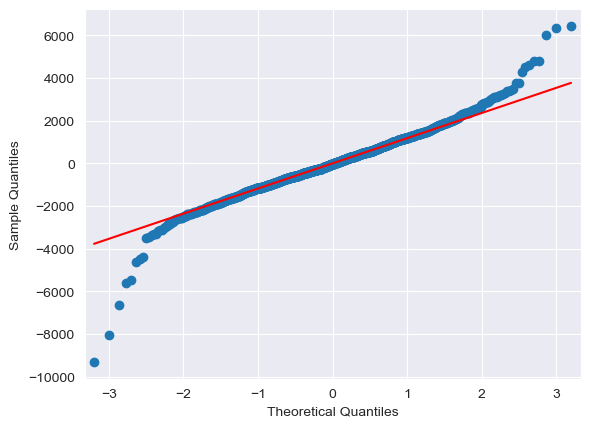

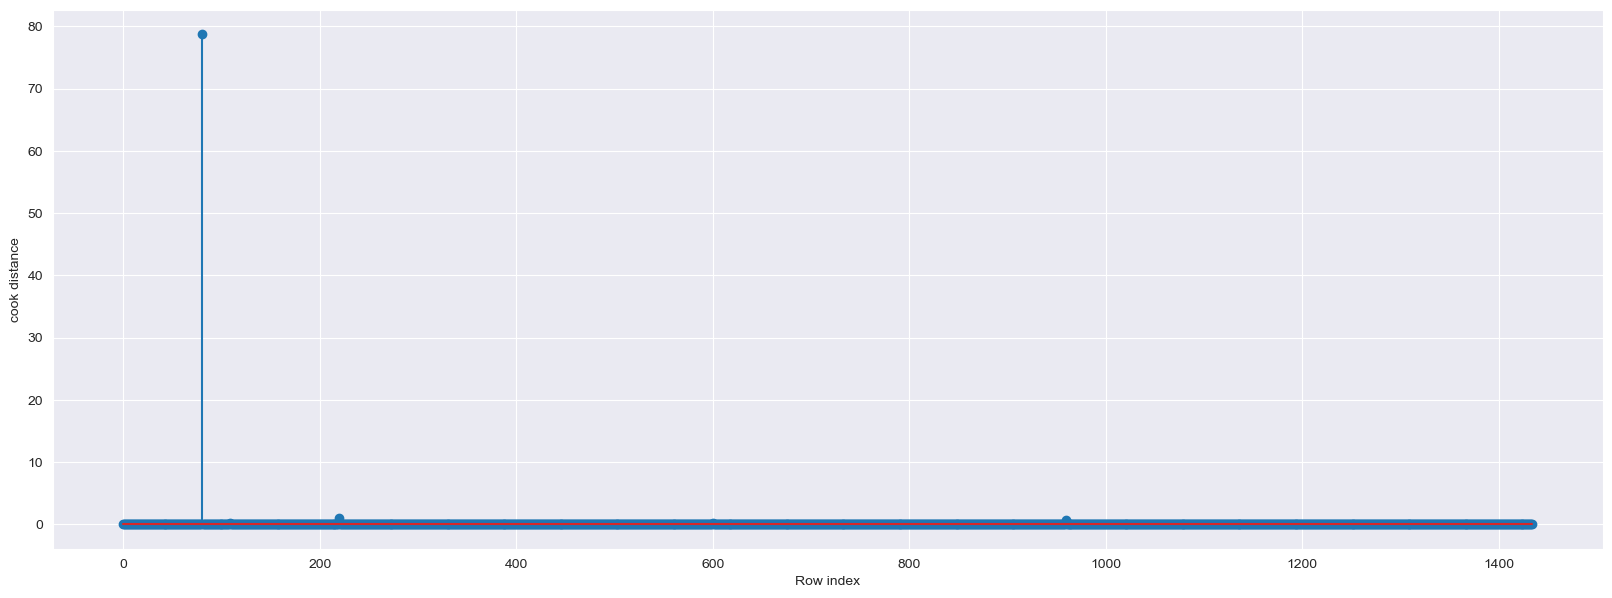

In [ ]:
fig =plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c,3))
plt.xlabel("Row index")
plt.ylabel("cook distance")
plt.show()

In [ ]:
np.argmax(c),np.max(c)

(80, 78.72950582248232)

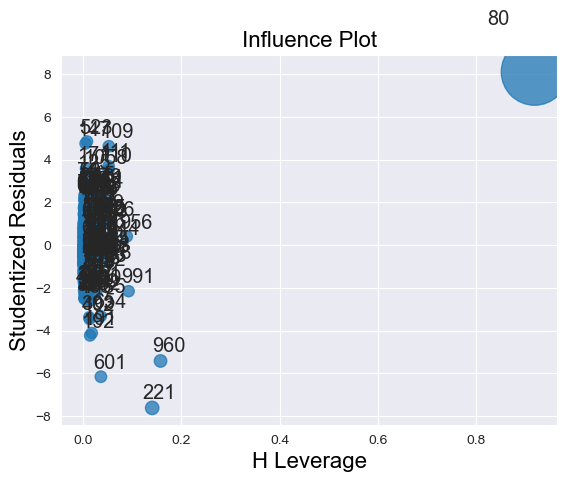

In [ ]:
influence_plot(model)
plt.show()

In [ ]:
k=df1.shape[1]
n=df1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [ ]:
df1[df1.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QuarterlyTax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [ ]:
df1 =df1.drop(df.index[[80]]).reset_index(drop=True)
df1.shape

(1434, 9)

In [ ]:
#final model
final_m1_v = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QuarterlyTax+Weight",data=df1).fit()
final_m1_v.rsquared,final_m1_v.aic

(0.8681163912634053, 24669.363894157)

In [ ]:
final_m1_v.predict(df1)

0       16513.565909
1       16051.656226
2       16486.949796
3       16133.995128
4       15921.372341
            ...     
1429     8970.611964
1430     8435.944671
1431     8591.765915
1432     8714.053275
1433     9966.948423
Length: 1434, dtype: float64